## 1. 파이토치로 다층 퍼셉트론 구현하기

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [4]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

위 인공 신경망을 그림으로 표현하면 아래와 같다.
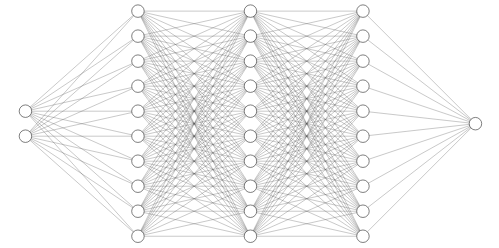
이제 비용 함수와 옵티마이저를 선언한다. nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수다.

In [5]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [7]:
for epoch in range(10001):
    optimizer.zero_grad()
    
    hypothesis = model(X)
    
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(epoch, cost.item())

0 0.00015648972475901246
1000 0.00012654891179408878
2000 0.00010598285007290542
3000 9.102056355914101e-05
4000 7.96499807620421e-05
5000 7.06936843926087e-05
6000 6.352573109325022e-05
7000 5.763940134784207e-05
8000 5.273664282867685e-05
9000 4.859390537603758e-05
10000 4.498764974414371e-05


## 2. 학습된 다층 퍼셉트론의 예측값 확인하기
---

In [8]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[3.224186e-05]
 [9.999505e-01]
 [9.999546e-01]
 [5.277891e-05]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


실제값은 0, 1, 1, 0 이며 예측값은 0, 1, 1, 0으로 문제를 해결하는 모습을 보여준다.